# Diabetes Prediction System

# Anderson Chama

# Date: 18/06/2024

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('../DiaPreSys/diabetes.csv')

In [2]:
# Display the first few rows of the dataset to understand its structure
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Problem Statement

The objective of this project is to diagnostically predict whether a patient has diabetes based on certain diagnostic measurements included in the dataset.
All patients in this dataset are females at least 21 years old of Pima Indian heritage.

In [3]:
# Summary Statistics
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.0000

In [4]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


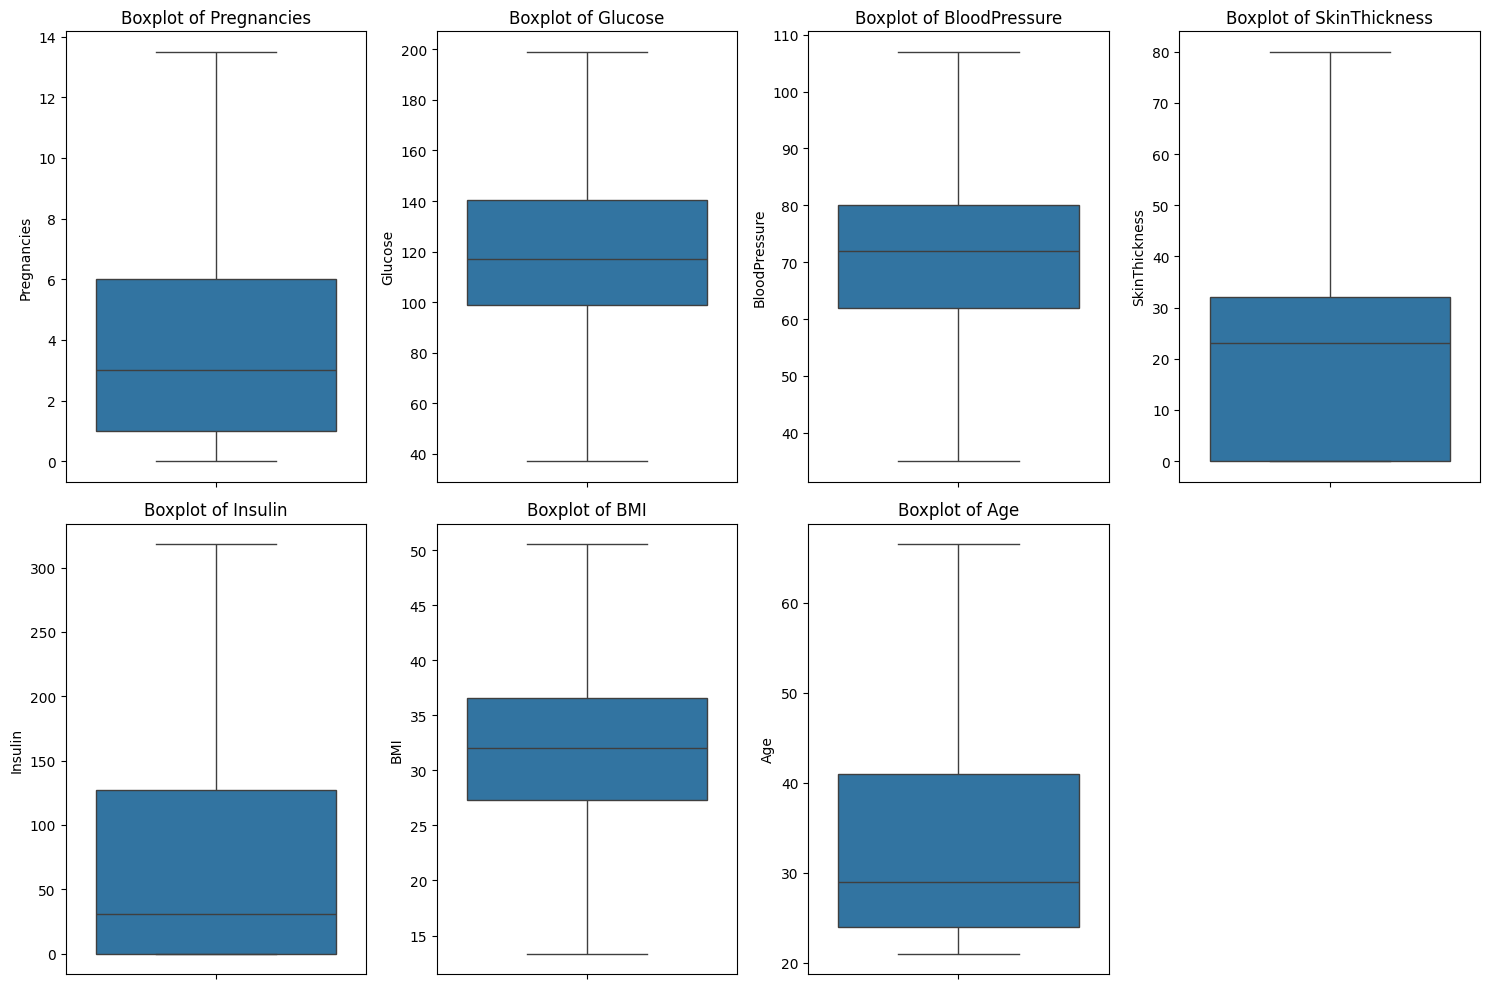

In [5]:
# Identify and handle outliers using the IQR method
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Columns to check for outliers
columns_to_check = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']

# Apply the function to each column
for column in columns_to_check:
    handle_outliers(df, column)

# Box plots to visualize the effect of outlier handling
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=column, data=df)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

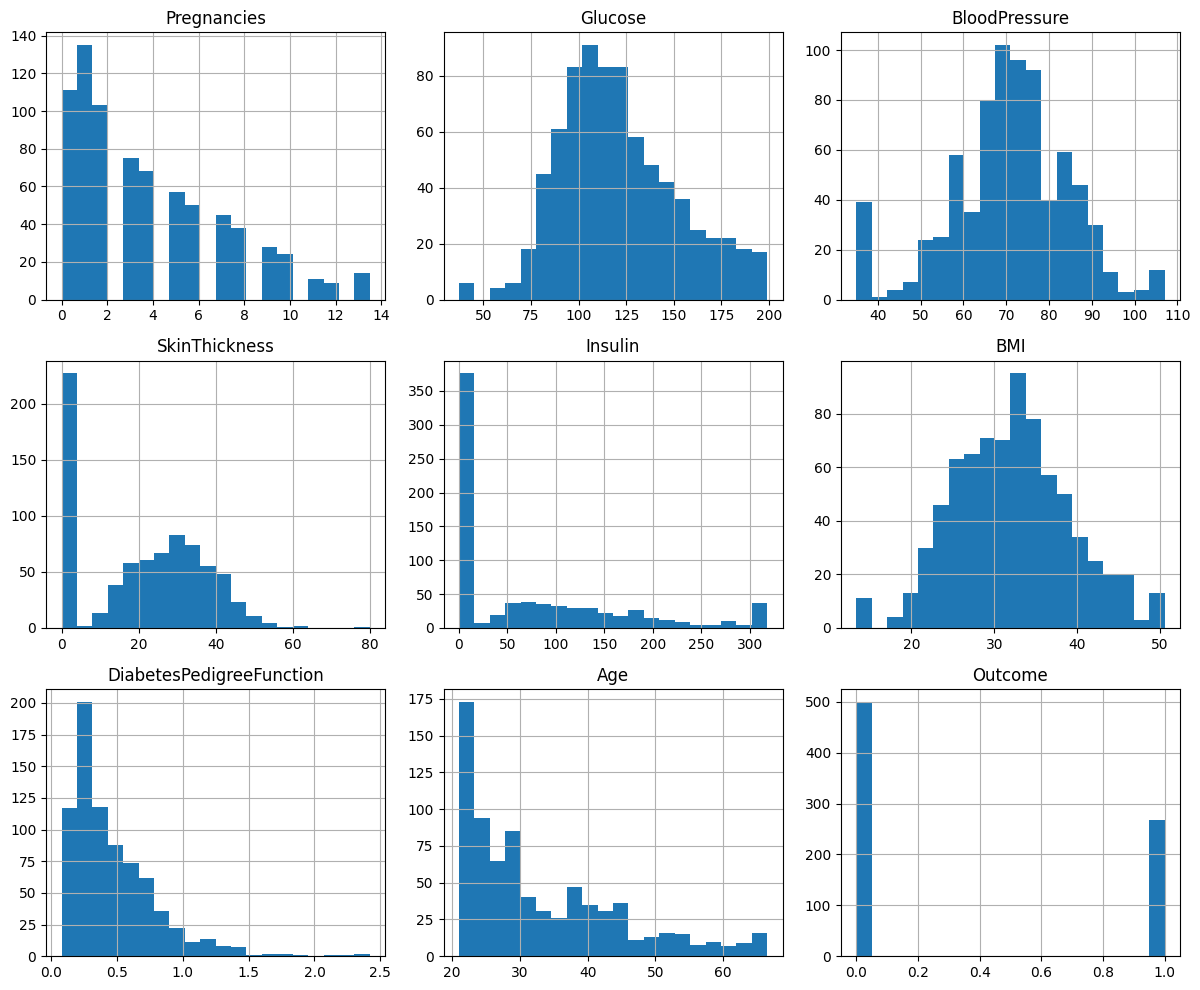

In [6]:
# Histograms of numeric variables
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

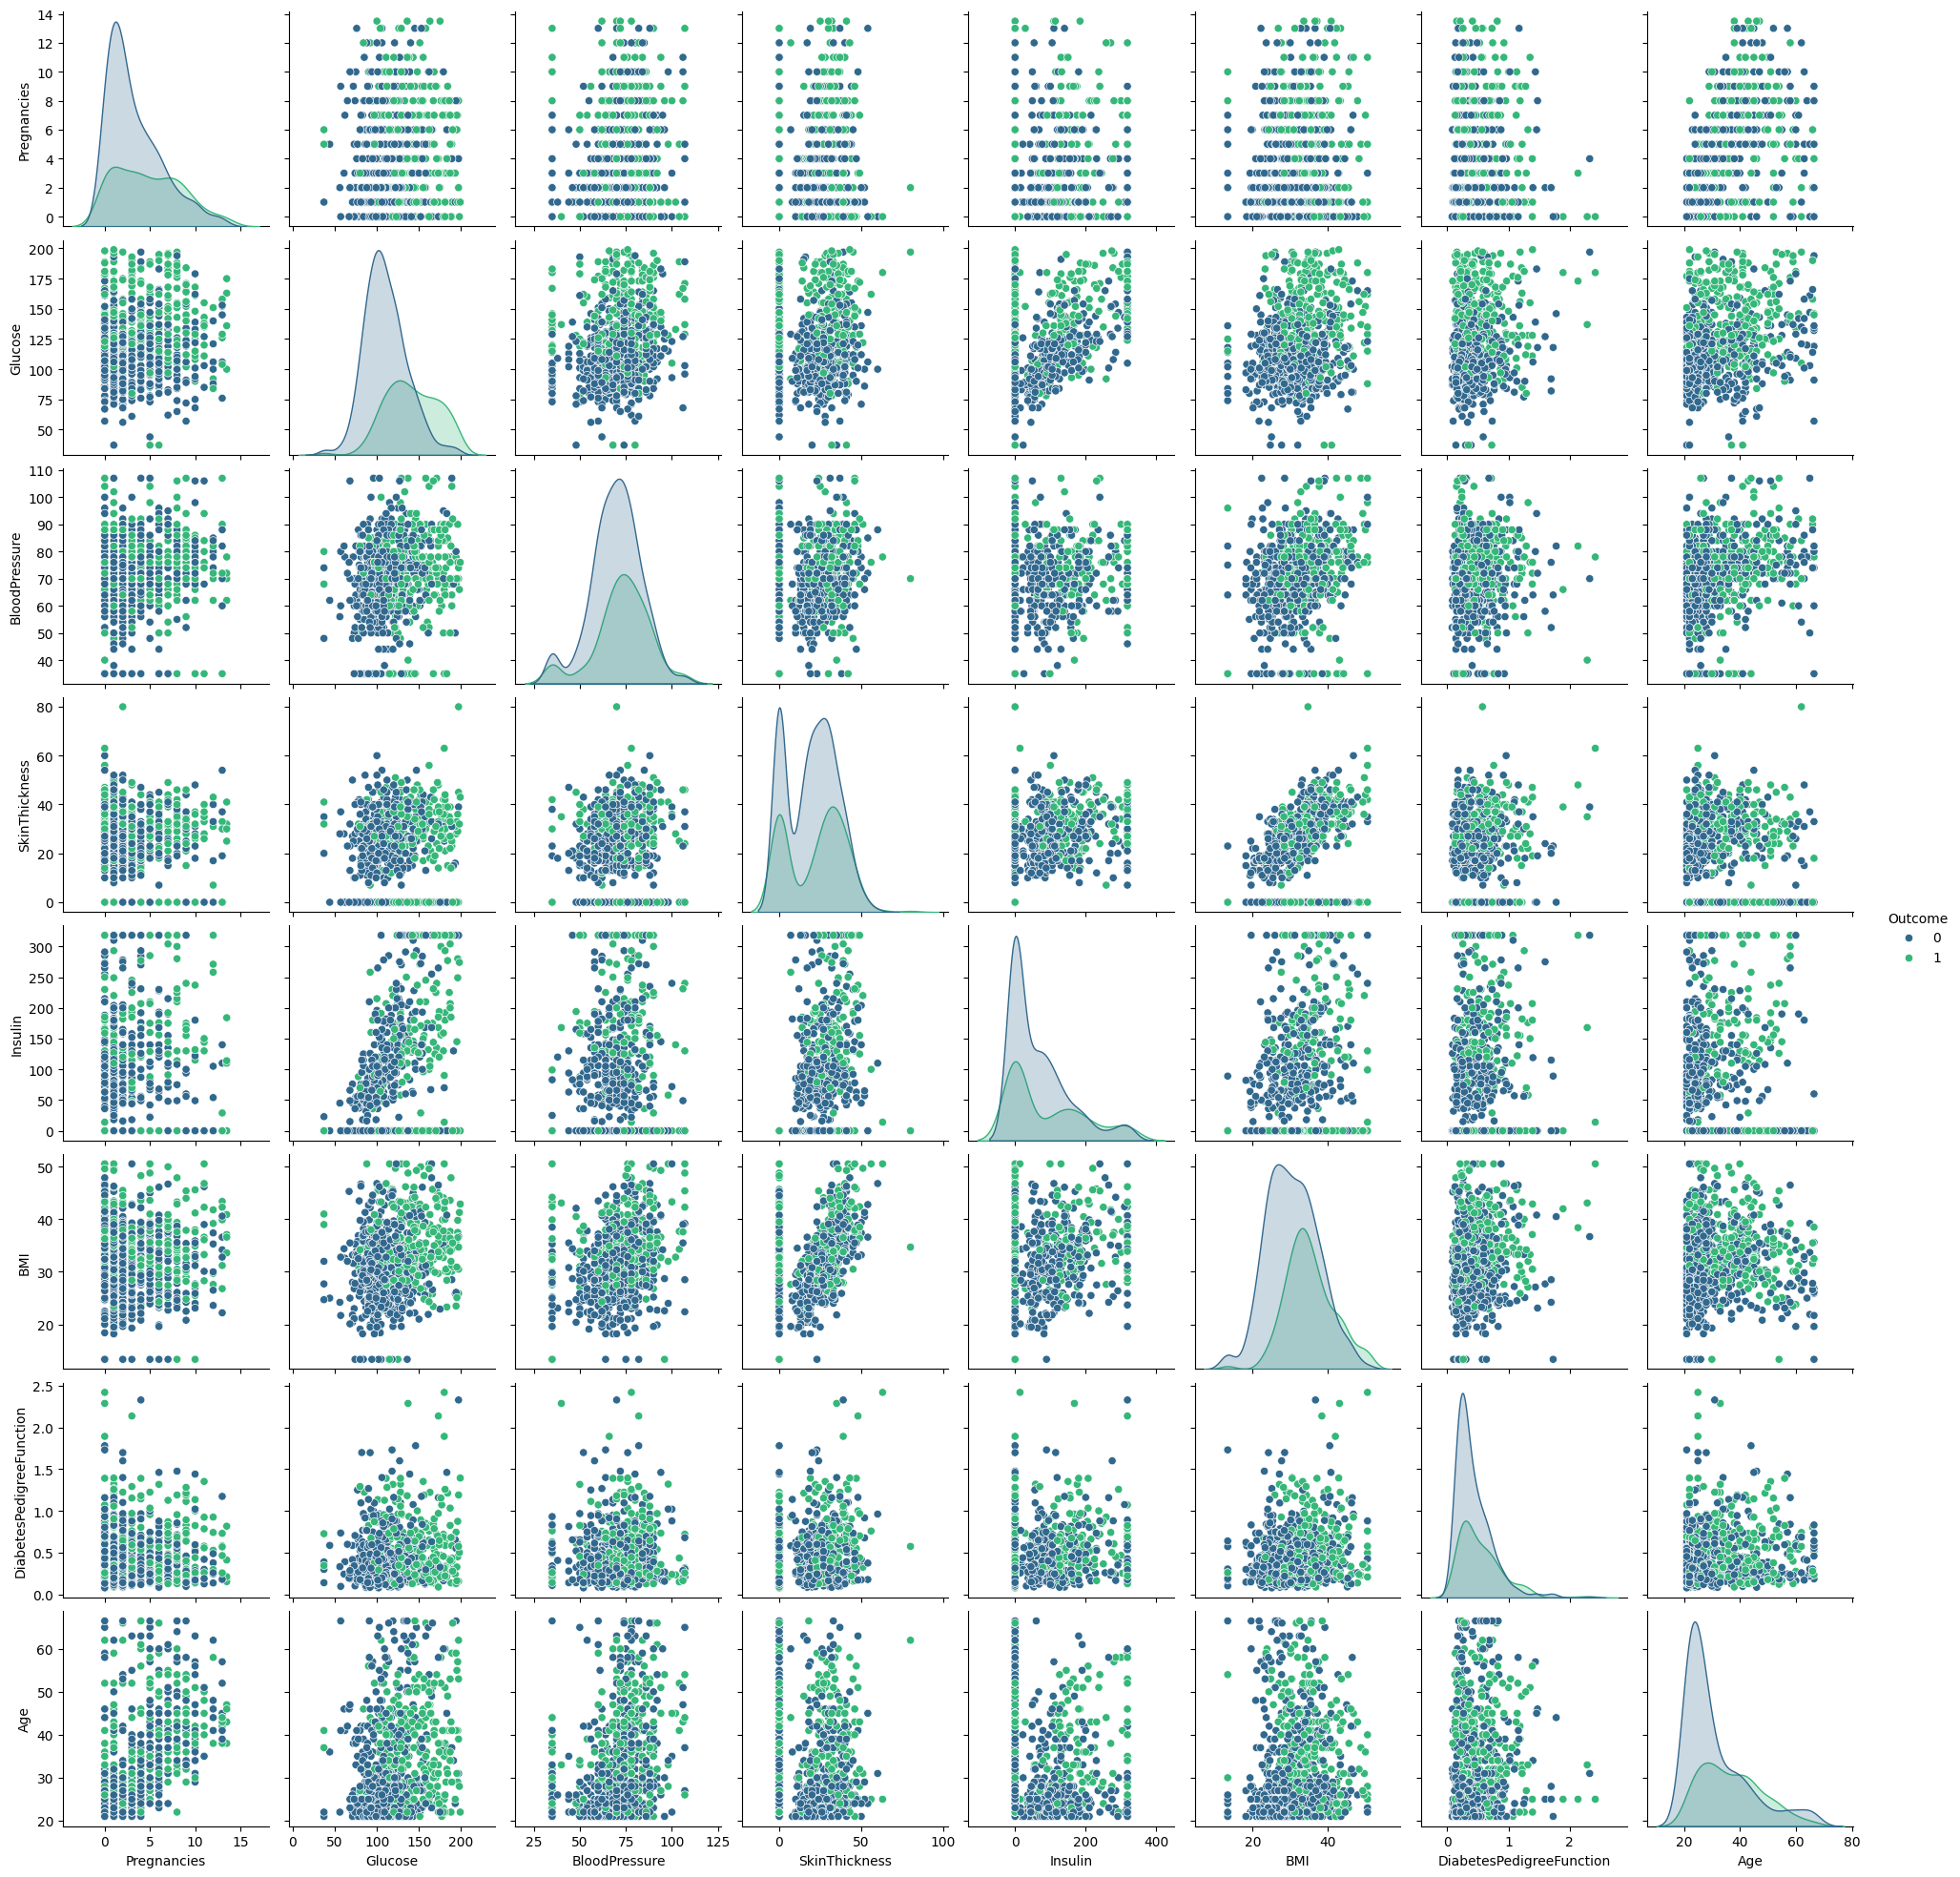

In [7]:
# Pairplot for visualizing relationships between variables
sns.pairplot(df, hue='Outcome', palette='viridis')
plt.show()

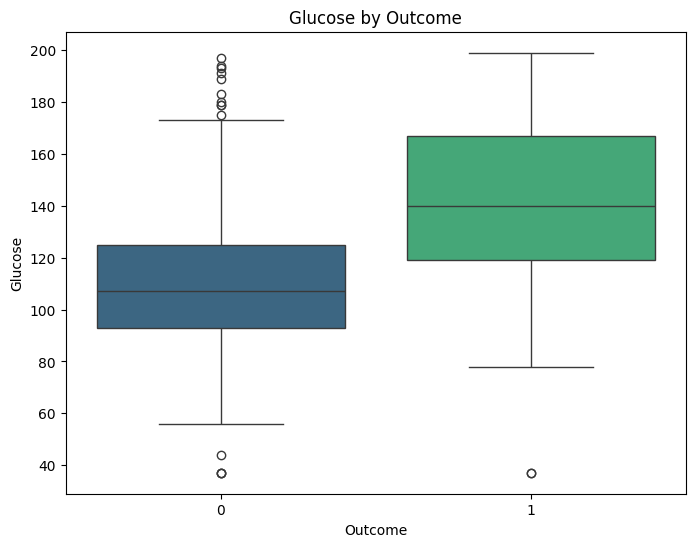

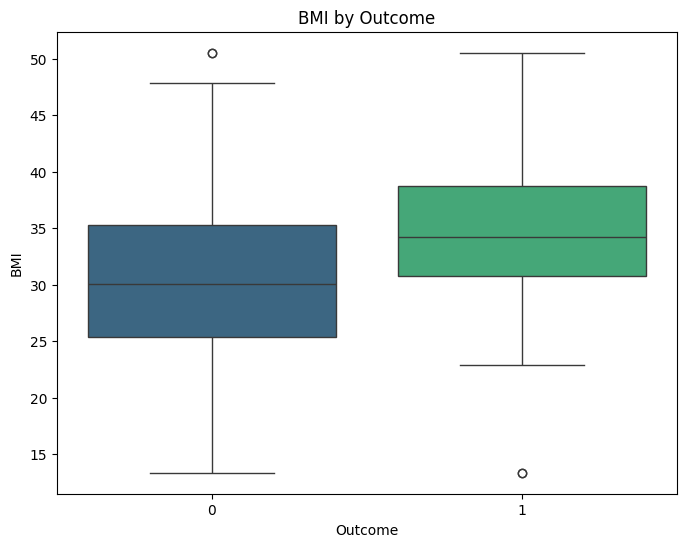

In [8]:
# Box plots to compare variables by Outcome
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Glucose', data=df, hue='Outcome', palette='viridis', legend=False)
plt.title('Glucose by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Glucose')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='BMI', data=df, hue='Outcome', palette='viridis', legend=False)
plt.title('BMI by Outcome')
plt.xlabel('Outcome')
plt.ylabel('BMI')
plt.show()

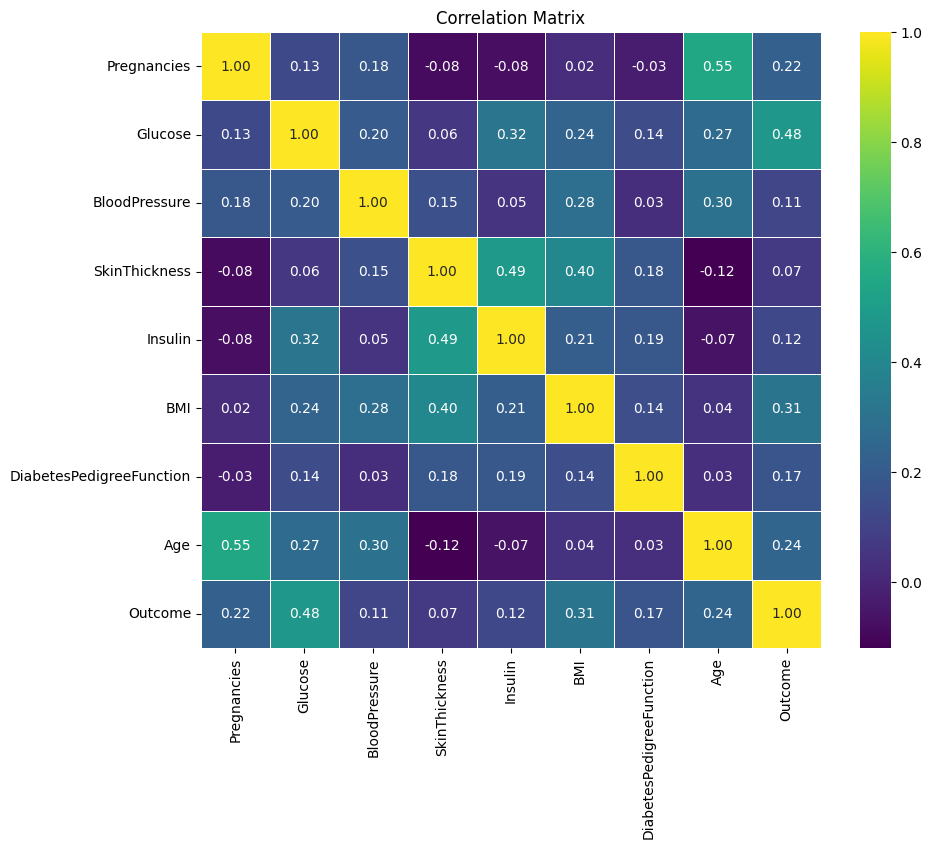

In [9]:
# Correlation matrix
correlation = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [10]:
# Model Selection and Evaluation
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [11]:
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Initialize and train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [13]:
# Evaluate model performance on the test set
y_pred = model.predict(X_test)

In [14]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.79        99
           1       0.61      0.64      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



In [15]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[77 22]
 [20 35]]


In [16]:
# Cross-validation for additional evaluation
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-validation Scores: [0.76623377 0.74675325 0.75974026 0.79738562 0.77777778]
Mean CV Accuracy: 0.7695781342840167


# Visual Observations:

1. From the histograms, it is evident that the distribution of Glucose and BMI levels differ significantly between diabetic and non-diabetic patients.
2. The pairplot shows that certain combinations of features (like Glucose vs BMI) can provide better separation between the Outcome classes.
3. Box plots highlight that diabetic patients tend to have higher glucose and BMI levels compared to non-diabetic patients.
4. The correlation matrix indicates strong correlations between Glucose and Outcome, BMI and Outcome, and a negative correlation between SkinThickness and Age.


# Recommendations:

1. Focus on Glucose and BMI as primary indicators for diabetes prediction models.
2. Consider feature engineering techniques to create additional meaningful features based on the existing ones.
3. Implement more complex models (e.g., Random Forest, Gradient Boosting) and compare their performance with Logistic Regression.
4. Ensure data normalization or standardization before applying certain models to improve performance.
5. Regularly retrain the model with new data to maintain accuracy and relevance over time.


# End of Project:

This exploratory data analysis has provided valuable insights into the predictors of diabetes among patients in the dataset.
The Logistic Regression model showed promising results with an acceptable accuracy, precision, and recall.
Future work will involve exploring more advanced models and feature engineering to further enhance predictive performance.
Early prediction of diabetes can significantly impact patient health outcomes and guide healthcare providers in timely interventions.


In [17]:
# Save the Notebook
!jupyter nbconvert --to html DiaPreSys.ipynb


[NbConvertApp] Converting notebook DiaPreSys.ipynb to html
[NbConvertApp] Writing 3760595 bytes to DiaPreSys.html
